In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [54]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


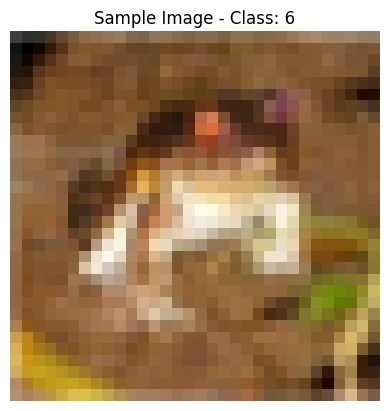

In [55]:
plt.imshow(x_train[0])
plt.title(f"Sample Image - Class: {y_train[0][0]}")
plt.axis('off')
plt.show()


In [56]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test, y_test_cat))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 91ms/step - accuracy: 0.3392 - loss: 1.8018 - val_accuracy: 0.5418 - val_loss: 1.2801
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 77ms/step - accuracy: 0.5462 - loss: 1.2699 - val_accuracy: 0.6188 - val_loss: 1.0973
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6058 - loss: 1.1151 - val_accuracy: 0.6205 - val_loss: 1.0853
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6424 - loss: 1.0235 - val_accuracy: 0.6630 - val_loss: 0.9598
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6680 - loss: 0.9532 - val_accuracy: 0.6441 - val_loss: 1.0077
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6813 - loss: 0.9080 - val_accuracy: 0.6865 - val_loss: 0.8969
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.7037 - loss: 0.8519 - val_accuracy: 0.6900 - val_loss: 0.8877
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.7133 - loss: 0.8167 - 

In [58]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7009 - loss: 0.9053
Test Accuracy: 69.47%
